In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('cardio_train.csv'  , sep=';')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.shape

(70000, 13)

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df["age_years"] = (df["age"] / 365).round(1)


In [12]:
df["bmi"] = df["weight"] / ((df["height"]/100) ** 2)


In [13]:
df[["age_years", "bmi", "ap_hi", "ap_lo"]].describe()


,age_years,bmi,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339486,27.556513,128.817286,96.630414
std,6.759534,6.091511,154.011419,188.472530
min,29.600000,3.471784,-150.000000,-70.000000
25%,48.400000,23.875115,120.000000,80.000000
50%,54.000000,26.374068,120.000000,80.000000
75%,58.400000,30.222222,140.000000,90.000000
max,65.000000,298.666667,16020.000000,11000.000000


In [14]:
feature_cols = ["age_years", "bmi", "ap_hi", "ap_lo",
                "cholesterol", "gluc", "smoke", "alco", "active"]
target_col = "cardio"

X = df[feature_cols]
y = df[target_col]


In [15]:
y.value_counts(normalize=True)


cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [16]:
df[["age_years", "bmi", "ap_hi", "ap_lo"]].corr()


,age_years,bmi,ap_hi,ap_lo
age_years,1.000000,0.085492,0.020778,0.017630
bmi,0.085492,1.000000,0.024852,0.035345
ap_hi,0.020778,0.024852,1.000000,0.016086
ap_lo,0.017630,0.035345,0.016086,1.000000


In [17]:
df[["age_years", "bmi", "ap_hi", "ap_lo"]].describe()


,age_years,bmi,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339486,27.556513,128.817286,96.630414
std,6.759534,6.091511,154.011419,188.472530
min,29.600000,3.471784,-150.000000,-70.000000
25%,48.400000,23.875115,120.000000,80.000000
50%,54.000000,26.374068,120.000000,80.000000
75%,58.400000,30.222222,140.000000,90.000000
max,65.000000,298.666667,16020.000000,11000.000000


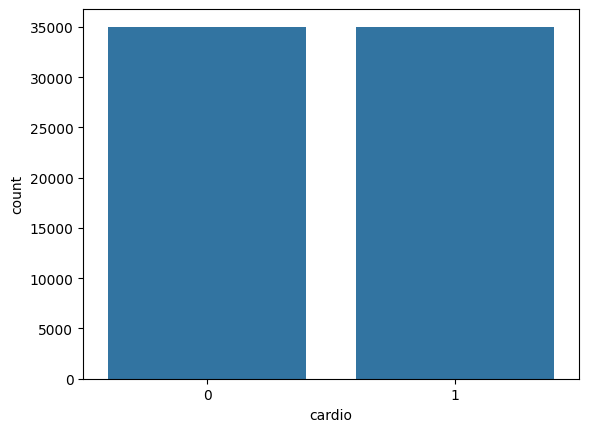

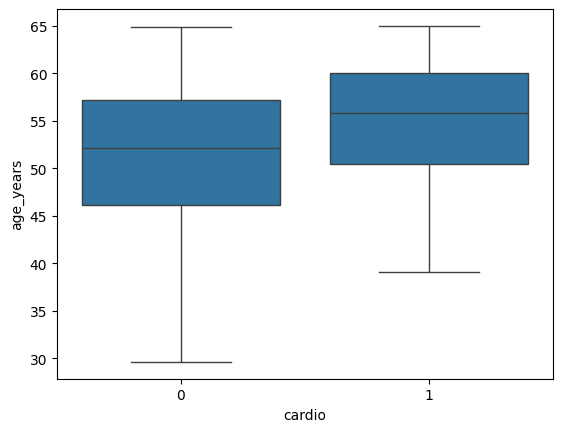

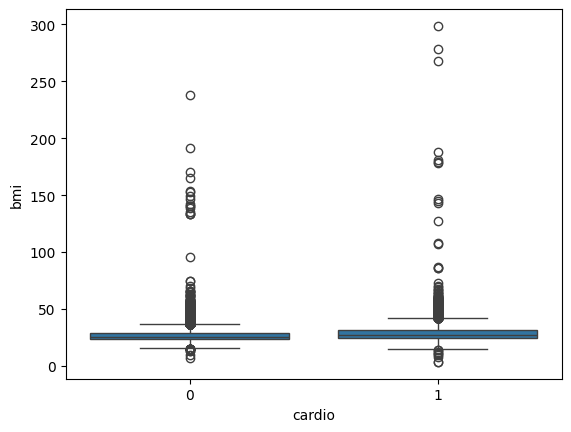

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="cardio", data=df)
plt.show()

sns.boxplot(x="cardio", y="age_years", data=df)
plt.show()

sns.boxplot(x="cardio", y="bmi", data=df)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(
    criterion="gini",      
    max_depth=4,           
    random_state=42
)

dt_clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred = dt_clf.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy: 0.7245
Confusion Matrix:
 [[5098 1906]
 [1951 5045]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      7004
           1       0.73      0.72      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [24]:
importances = dt_clf.feature_importances_
feat_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
feat_importance


ap_hi          0.793872
age_years      0.124013
cholesterol    0.072718
gluc           0.005874
bmi            0.002275
ap_lo          0.001249
smoke          0.000000
alco           0.000000
active         0.000000
dtype: float64

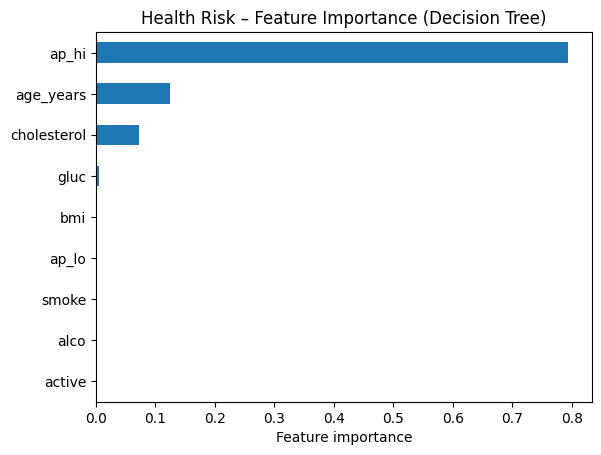

In [25]:

feat_importance.head(10).plot(kind="barh")
plt.xlabel("Feature importance")
plt.title("Health Risk – Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()


In [26]:
from sklearn import tree


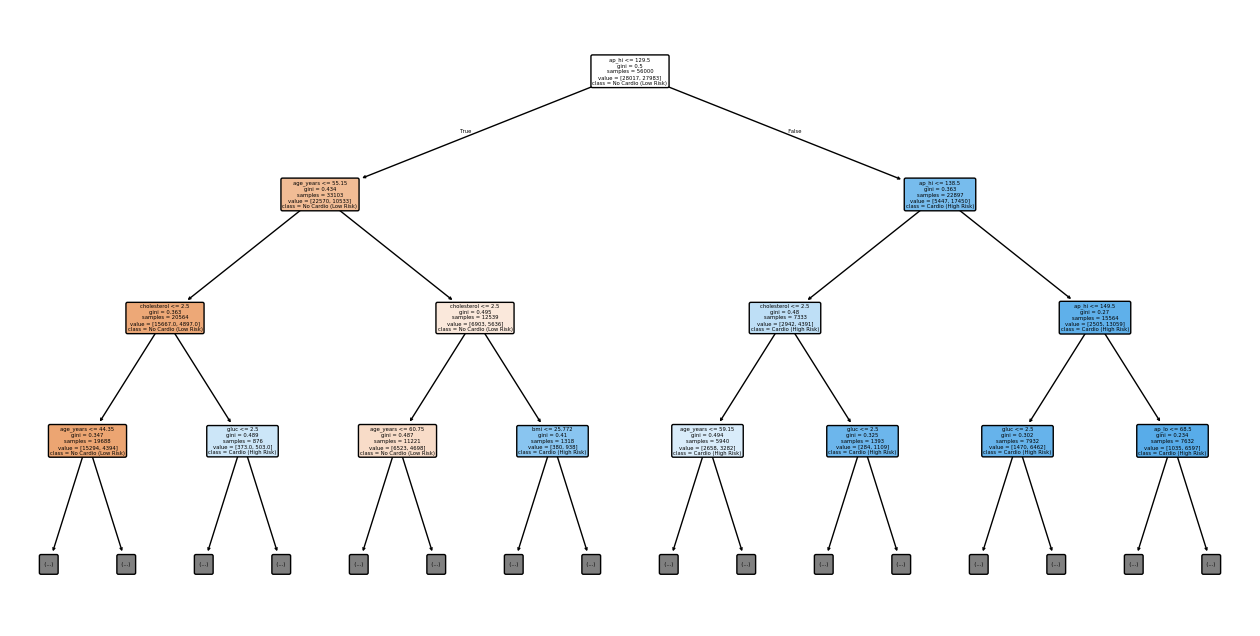

In [27]:
plt.figure(figsize=(16, 8))
tree.plot_tree(
    dt_clf,
    feature_names=X_train.columns,
    class_names=["No Cardio (Low Risk)", "Cardio (High Risk)"],
    filled=True,
    rounded=True,
    max_depth=3  # just to keep the plot readable
)
plt.show()

In [28]:
dt_clf_tuned = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,           # a bit deeper than before
    min_samples_split=100, # require more samples to split
    min_samples_leaf=50,   # leaves must have at least 50 samples
    random_state=42
)

dt_clf_tuned.fit(X_train, y_train)

y_pred_tuned = dt_clf_tuned.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy:", acc_tuned)


Tuned Accuracy: 0.7292857142857143


In [29]:
importances_tuned = dt_clf_tuned.feature_importances_
feat_importance_tuned = pd.Series(importances_tuned, index=X_train.columns)\
                           .sort_values(ascending=False)
feat_importance_tuned


ap_hi          0.769927
age_years      0.122256
cholesterol    0.073145
bmi            0.017029
gluc           0.006781
ap_lo          0.006374
active         0.003466
smoke          0.001022
alco           0.000000
dtype: float64

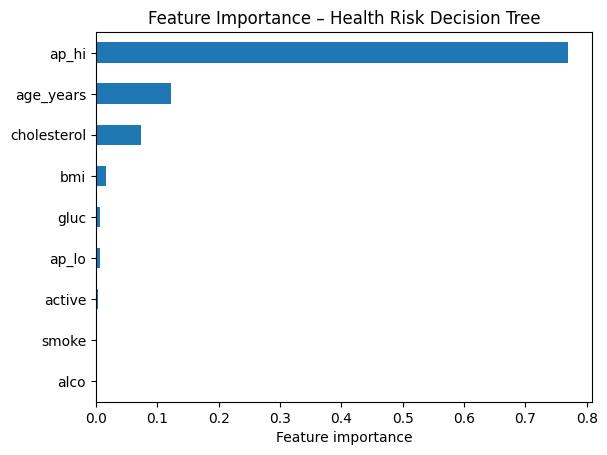

In [33]:
feat_importance_tuned.plot(kind="barh")
plt.xlabel("Feature importance")
plt.title("Feature Importance – Health Risk Decision Tree")
plt.gca().invert_yaxis()
plt.show()


In [34]:
import joblib

# Save the model
joblib.dump(dt_clf_tuned, "models/health_risk_dt.joblib")


['models/health_risk_dt.joblib']